# DATA FEATURES

•Pregnancies: Number of pregnancies of the patient.

•Glucose: Glucose of the patient.

•BloodPressure: Blood pressure of the patient.

•SkinThickness: Skin thickness of the patient.

•Insulin: Insuling of the patient.

•BMI: BMI of the patient.

•DiabetesPedigreeFunction: Diabetes pedigree function of the patient.

•Age: Age of the patient.

•Outcome: (TARGET VARIABLE) Whether the patient is likely to suffer from diabetes or not.

# EXPLORATORY DATA ANALYSIS

## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d # used in 3D plotting

import matplotlib.pyplot as plt # data visualization
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns #

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## CORRELATION MATRIX

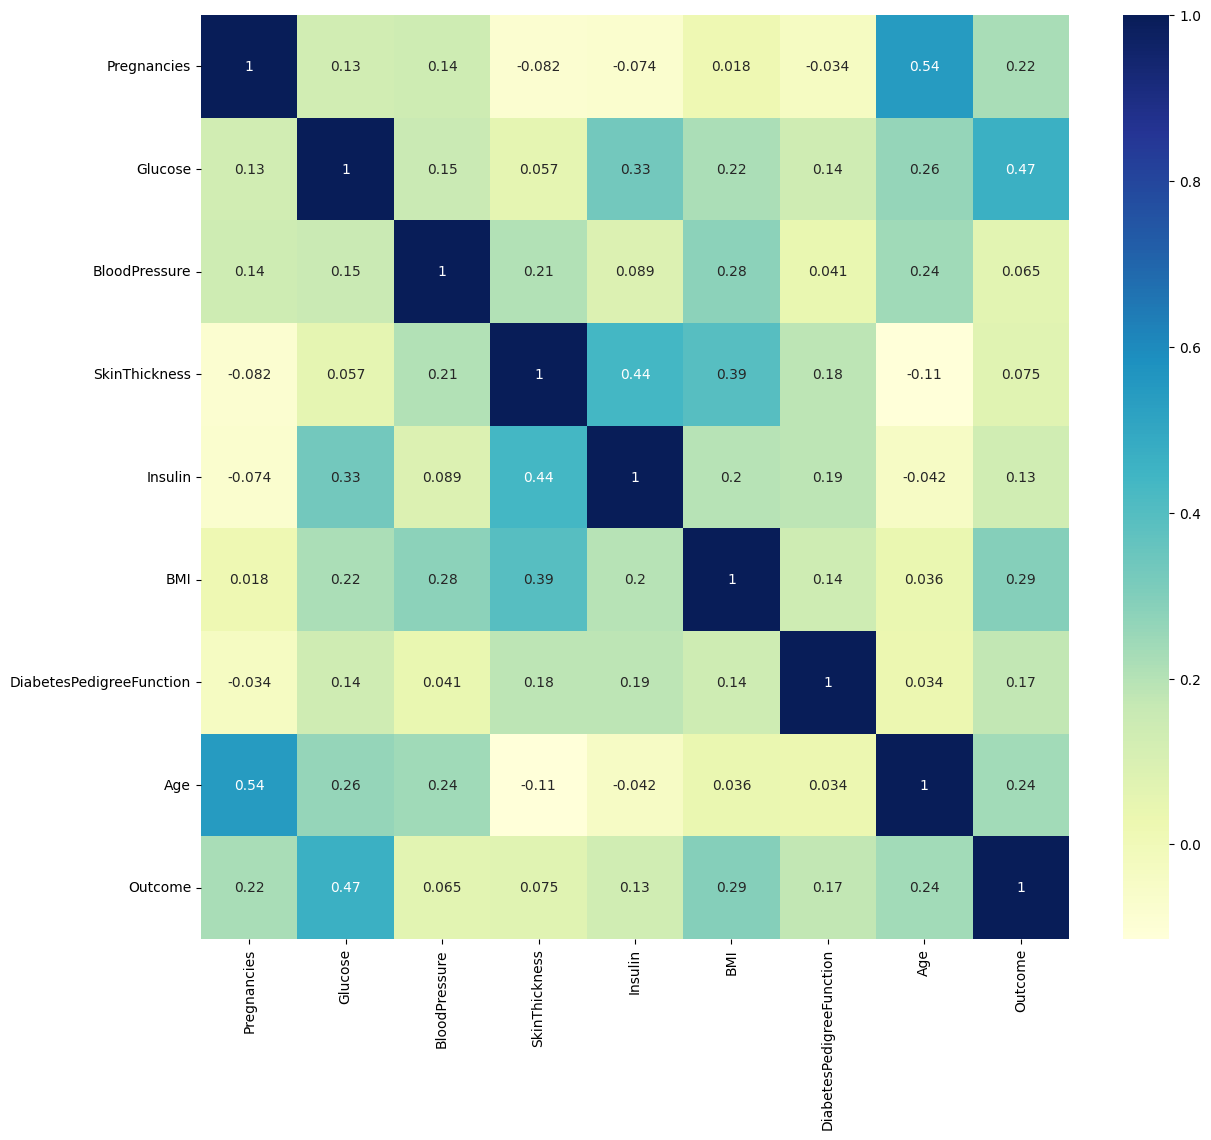

In [6]:
corr = df.corr()
max(corr)
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='YlGnBu', annot=True) 
plt.show()

## DATA VISUALIZATIONS

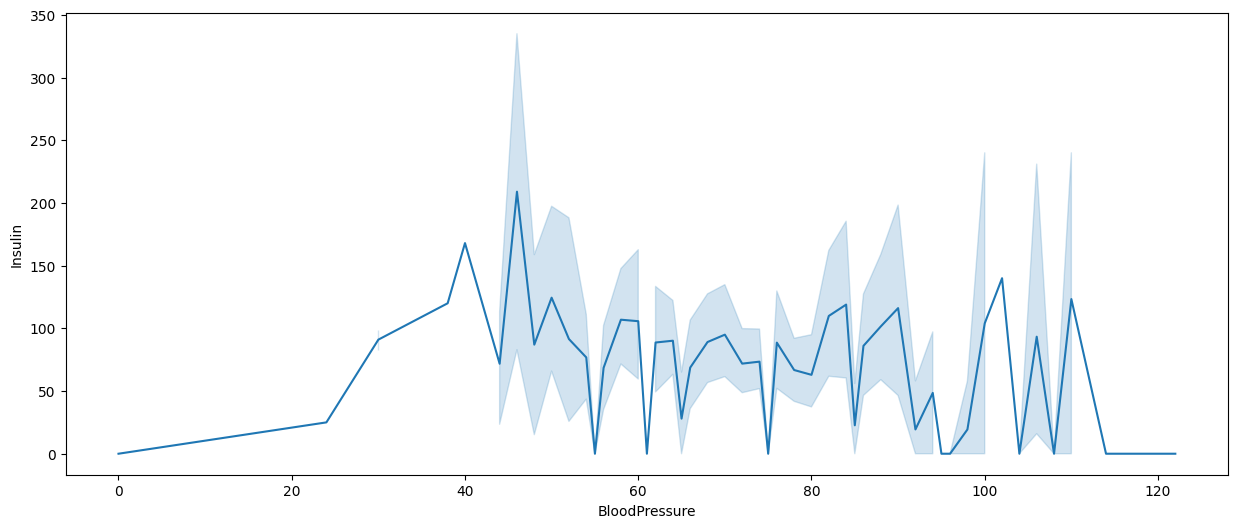

In [7]:
plt.figure(figsize=(15,6))
sns.lineplot(x = df['BloodPressure'], y = df['Insulin'])
plt.show()

<AxesSubplot: xlabel='BMI'>

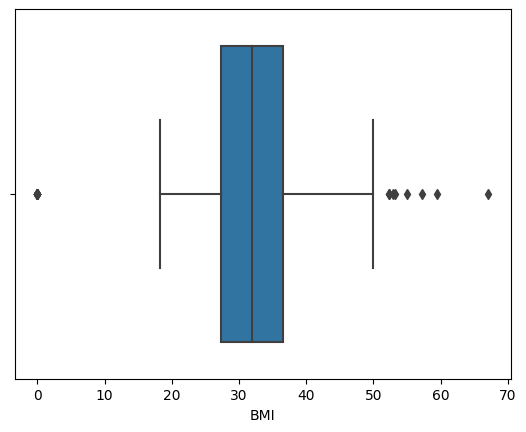

In [8]:
sns.boxplot(x='BMI', data=df)

<AxesSubplot: xlabel='Pregnancies', ylabel='count'>

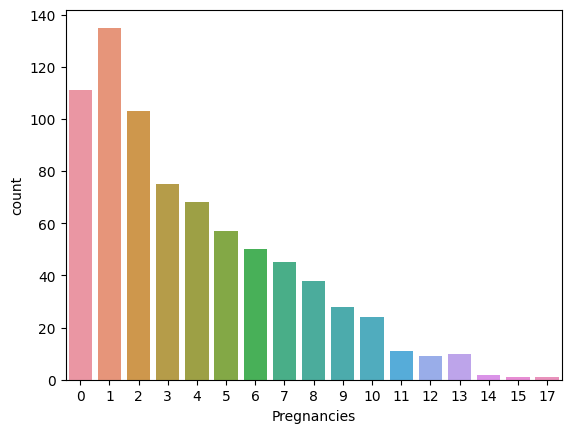

In [9]:
sns.countplot(x='Pregnancies', data=df)

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

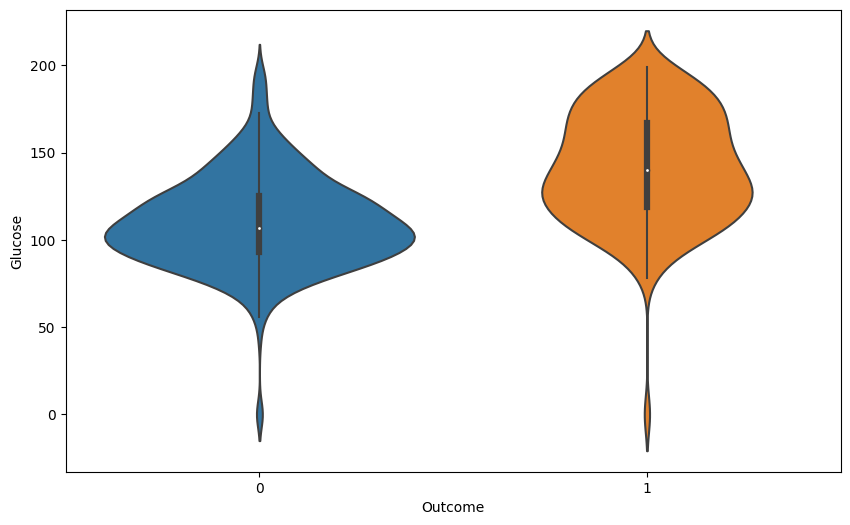

In [10]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Outcome', y='Glucose', data=df)

Text(0, 0.5, 'Age')

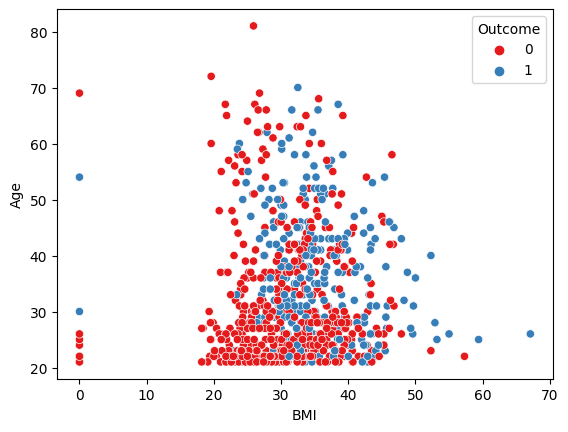

In [11]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df, palette='Set1')
plt.xlabel('BMI')
plt.ylabel('Age')

## TRAIN TEST SPLITTING

In [12]:
X= df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 82)

In [14]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


# CHECKING ACCURACY OF THE MODEL

In [15]:
import lazypredict

### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)


In [16]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.04it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearDiscriminantAnalysis         0.84               0.79     0.79      0.84   
RidgeClassifier                    0.84               0.79     0.79      0.84   
LinearSVC                          0.84               0.78     0.78      0.83   
CalibratedClassifierCV             0.84               0.78     0.78      0.83   
RidgeClassifierCV                  0.84               0.78     0.78      0.83   
LogisticRegression                 0.84               0.78     0.78      0.83   
BaggingClassifier                  0.84               0.77     0.77      0.84   
SVC                                0.82               0.77     0.77      0.82   
NuSVC                              0.82               0.77     0.77      0.81   
NearestCentroid                    0.77               0.75     0.75      0.77   
RandomForestClassifier      

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
lda = LinearDiscriminantAnalysis()

# Define the hyperparameters to tune
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None],
    'n_components': [None, 1, 2, 3]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Instantiate a new LDA model with the optimized hyperparameters
lda = LinearDiscriminantAnalysis(**grid_search.best_params_)

# Fit the model on the training data
lda.fit(X_train, y_train)

# Evaluate the model on the testing data
score = lda.score(X_test, y_test)
print(f"Testing accuracy: {score}")

Best parameters: {'n_components': None, 'shrinkage': None, 'solver': 'svd'}
Best score: 0.7605224576835933
Testing accuracy: 0.8441558441558441


In [18]:
y_pred = lda.predict(X_test)


# PERFORMANCE MEASURE

## CLASSIFICATION REPORT

In [19]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y_pred))



Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.86      0.93      0.89       107
           1       0.79      0.66      0.72        47

    accuracy                           0.84       154
   macro avg       0.83      0.79      0.81       154
weighted avg       0.84      0.84      0.84       154



In [20]:
def get_classification_report(y_test, y_pred):
    
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

s= get_classification_report(y_test, y_pred)
s

,precision,recall,f1-score,support
0,0.86,0.93,0.89,107.00
accuracy,0.84,0.84,0.84,0.84
weighted avg,0.84,0.84,0.84,154.00
macro avg,0.83,0.79,0.81,154.00
1,0.79,0.66,0.72,47.00


## CONFUSION MATRIX

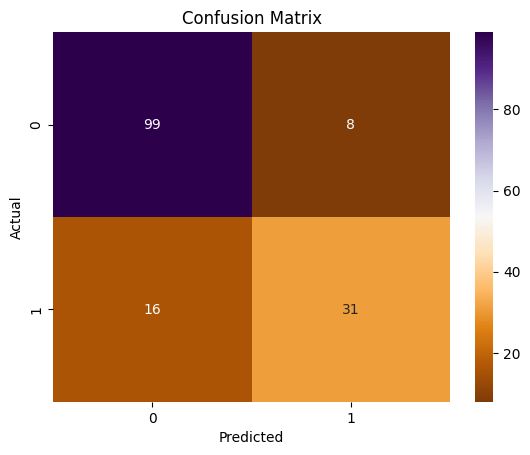

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='PuOr', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# PICKLING THE MODEL

In [22]:
import pickle
with open('diabetes.pkl', 'wb') as files:
    pickle.dump(lda,files)